# Californian Housing Market




Analysis of the Californian Housin Market using linear Regression

1. Import of librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

  2. Import Data

In [2]:
from sklearn import datasets
data = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

In [3]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
data["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

3. Convert to DF

In [6]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data["data"])
dataset.loc[:,'Price'] = data["target"]
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

5. Data Vizualisation

a. _Price_ as a function of _MedInc_.

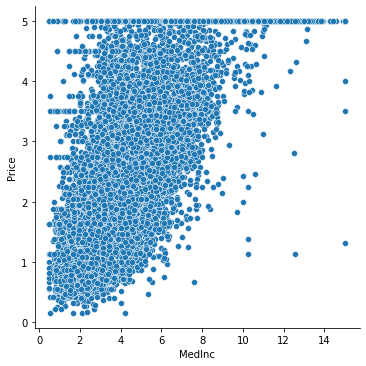

In [8]:
sns.relplot(x="MedInc", y= "Price", data=dataset);


b. age of the house in relation to the price.

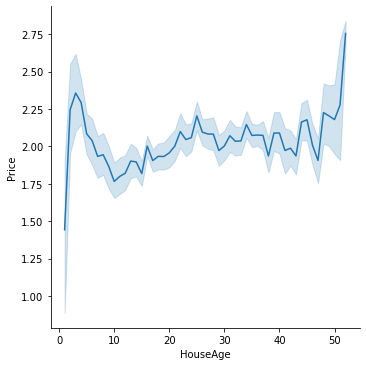

In [9]:
sns.relplot(x='HouseAge', y='Price', data= dataset, kind="line")

c. trend between _AveRooms_ & _Price_.

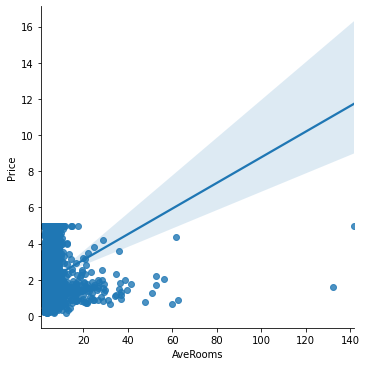

In [10]:
sns.lmplot(x='AveRooms', y='Price', data= dataset);

d. trend between _AveBedrms_ & _Price_.

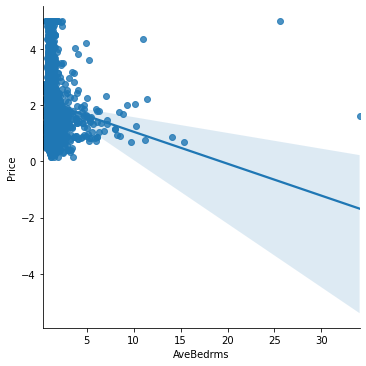

In [11]:
sns.lmplot(x='AveBedrms', y='Price', data= dataset);

e. trend between population (with filter) and priceDo

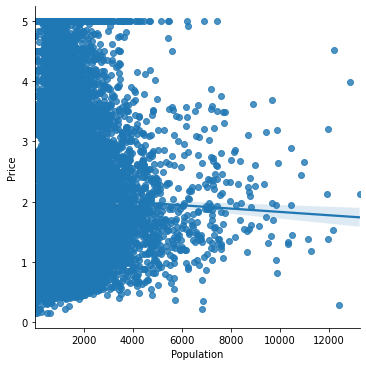

In [12]:
sns.lmplot(x='Population', y='Price', data= dataset[dataset['Population']<15000])

f. trend between AveOccup (with filter to have less than 100%) and PriceDo.

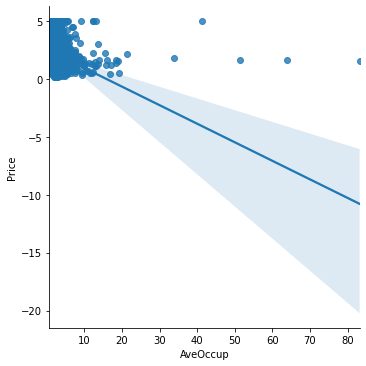

In [13]:
sns.lmplot(x='AveOccup', y='Price', data= dataset[dataset['AveOccup']<100])

6. Definition of X & y

In [14]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]


In [16]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [17]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


7. Train-Test Split with a size of 20%

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2)


8. Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)

X_test = sc_x.transform(X_test)
X_train

array([[ 0.90685574,  0.18954946,  0.3105059 , ..., -0.04915244,
         1.13833753, -1.32458294],
       [ 0.13121735,  1.86083517,  0.03586885, ..., -0.09760341,
         1.07271277, -1.3645973 ],
       [-0.64112157, -0.12879068, -0.78046592, ..., -0.08444683,
        -0.82103026,  0.67613501],
       ...,
       [-0.59445757, -0.52671585, -0.07526744, ..., -0.03729426,
         1.40552405, -0.86441781],
       [ 0.24015238, -1.16339612, -0.14947555, ..., -0.10459031,
        -0.86321761,  0.85619962],
       [-0.9919657 , -0.12879068, -0.68448812, ...,  0.07903689,
        -0.72728061,  0.89121219]])

9. Application of the model

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

10. R² Score

In [21]:
regressor.score(X_train, y_train)

0.6018021450480617

In [22]:
regressor.score(X_test, y_test)

0.6238244578010865

- No overfitting Detected as train is not significantly above test
- R² score is significantly > 0

11. Coefficients of explanatory variables to measure influence

In [23]:
regressor.coef_

array([[ 0.82464252,  0.1158264 , -0.26629877,  0.30846326, -0.00875713,
        -0.03979047, -0.91210489, -0.88310819]])

In [24]:
coefs = pd.DataFrame(index=dataset.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
MedInc,0.824643
HouseAge,0.115826
AveRooms,-0.266299
AveBedrms,0.308463
Population,-0.008757
AveOccup,-0.039790
Latitude,-0.912105
Longitude,-0.883108


In [25]:
coefs.apply(lambda x : abs(x)).sort_values(by="coefficients", ascending=False)

,coefficients
Latitude,0.912105
Longitude,0.883108
MedInc,0.824643
AveBedrms,0.308463
AveRooms,0.266299
HouseAge,0.115826
AveOccup,0.039790
Population,0.008757


---> Seems like the most influential columns are Latitude, Longitude, MedInc and the number of beds.

14. F-test to compare the significance

In [26]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, y_train)


feature_importance

C:\Users\33665\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(array([1.45655644e+04, 1.66107446e+02, 3.66902847e+02, 3.22071639e+01,
        1.04143972e+01, 8.38974927e+00, 3.51134786e+02, 3.58841012e+01]),
 array([0.00000000e+00, 7.97635696e-38, 6.66332170e-81, 1.40905377e-08,
        1.25280555e-03, 3.77838401e-03, 1.52789460e-77, 2.13757021e-09]))

15. Df to vizualise the f-score & p-value

In [27]:
feature_ranking = pd.DataFrame(columns=dataset.columns[:-1], data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

,f-score,p-value
MedInc,14565.564436,0.000000e+00
AveRooms,366.902847,6.663322e-81
Latitude,351.134786,1.527895e-77
HouseAge,166.107446,7.976357e-38
Longitude,35.884101,2.137570e-09
AveBedrms,32.207164,1.409054e-08
Population,10.414397,1.252806e-03
AveOccup,8.389749,3.778384e-03


It seems like all variables selected are significant as p-value <0.05

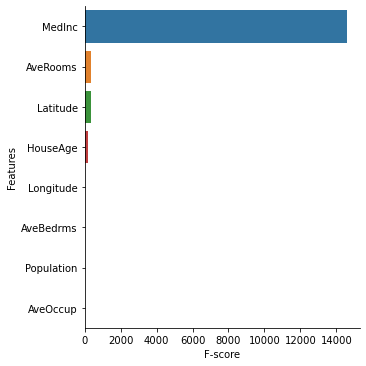

In [28]:
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index], data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

---> Here we see that the ranking of the features is slightly different. It is on this f-score that we will rely for the rest of the exercises.